# ML Capstone 1 - Part 1 E-Commerce Customer Segmentation

### Dataset: Download CSV file from [here](https://drive.google.com/file/d/1Kyi1Akx299BFhdo77T2MmWg7fLRtMaXm/view?usp=sharing)
 
### Context & Problem statement:

In this project, we delve deep into the thriving sector of online retail by analyzing a transactional dataset from a UK-based retailer, available at the UCI Machine Learning Repository. This dataset documents all transactions between 2010 and 2011. Our primary objective is to amplify the efficiency of marketing strategies and boost sales through customer segmentation. We aim to transform the transactional data into a customer-centric dataset by creating new features that will facilitate the segmentation of customers into distinct groups using the K-means clustering algorithm. This segmentation will allow us to understand the distinct profiles and preferences of different customer groups. Building upon this, we intend to develop a recommendation system that will suggest top-selling products to customers within each segment who haven't purchased those items yet, ultimately enhancing marketing efficacy and fostering increased sales.

### Objectives

- Data Cleaning & Transformation: Clean the dataset by handling missing values, duplicates, and outliers, preparing it for effective clustering.
- Feature Engineering: Develop new features based on the transactional data to create a customer-centric dataset, setting the foundation for customer segmentation.
- Data Preprocessing: Undertake feature scaling and dimensionality reduction to streamline the data, enhancing the efficiency of the clustering process.
- Customer Segmentation using K-Means Clustering: Segment customers into distinct groups using K-means, facilitating targeted marketing and personalized strategies.
- Cluster Analysis & Evaluation: Analyze and profile each cluster to develop targeted marketing strategies and assess the quality of the clusters formed.
- Recommendation System: Implement a system to recommend best-selling products to customers within the same cluster who haven't purchased those products, aiming to boost sales and marketing effectiveness.

## TODO: Please make use of Python, Pandas, Numpy, Matplotlib and relevant libraries to do the following:

### Data Retrieval (1 pt)
- Extracting the dataset from the source (e.g., CSV file)
- Exploring the dataset structure, features
- Understanding the context and significance of each feature

### Data preprocessing (2 pts)
- Cleaning the dataset to handle missing values, duplicates, and outliers
- Encoding categorical variables and transforming data types as necessary

### Feature Engineering & EDA (3 pts)
- Feature engineering to create new variables(eg Date_since_last_purchase) and do Exploratory Data Analysis (EDA)
- Identifying correlations and patterns in the data
- Make use of 1-d and 2-d explorations to know your data better.

### Effective Communication (2 pts)
- Please make use of markdown cells to communicate your thought process, why did you think of performing a step? what was the observation from the visualization? etc. 
- Make sure the plots are correctly labelled. 
- The code should be commented so that it is readable for the reviewer.

### Grading and Important Instructions
- Each of the above steps are mandatory and should be completed in good faith
- Make sure before submitting that the code is in fully working condition
- It is fine to make use of ChatGPT, stackoverflow type resources, just provide the reference links from where you got it
- Debugging is an art, if you find yourself stuck with errors, take help of stackoverflow and ChatGPT to resolve the issue and if it's still unresolved, reach out to me for help.
- You need to score atleast 7/10 to pass the project, anything less than that will be marked required, needing resubmission.
- Feedback will be provided on 3 levels (Awesome, Suggestion, & Required). Required changes are mandatory to be made.

#### Write your code below and do not delete the above instructions

DATA RETRIEVAL

In [2]:
#Loading the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
data = pd.read_csv("ecommerce_data.csv", encoding='ISO-8859-1')

# Explore the dataset structure

def explore_data(data):
    print("Dataset Head:\n", data.head())
    
    print("\nDataset Info:\n",  data.info())
   
    print("\nSummary Statistics:\n", data.describe())
    
    print("\nMissing Values per Column:\n", data.isnull().sum())
  
    print("\nDuplicate Rows:", data.duplicated().sum())

explore_data(data)


Dataset Head:
   InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0

Loading the dataset and exploring the dataset structure and features with functions like head, info, describe. Since there is an encoding issue while loading the data, using ISO-8859-1 encoder helps resolve the errors.

DATA PREPROCESSING

In [4]:
print("\nHandling missing values...")
data = data.dropna(subset=['CustomerID'])


Handling missing values...


In [5]:
# Fill missing values in the Description column with "Unknown"
data['Description'].fillna('Unknown', inplace=True)

In [6]:
# Remove duplicates
data = data.drop_duplicates()

In [7]:
# Remove rows with negative Quantity and UnitPrice
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

In [8]:
# Convert InvoiceDate to datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [9]:
# Remove outliers in Quantity and UnitPrice (filter out extreme negative and positive values)
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]
data = data[(data['Quantity'] < data['Quantity'].quantile(0.99)) & 
            (data['UnitPrice'] < data['UnitPrice'].quantile(0.99))]

Checking for null and duplicate values with the function of isnull and duplicated respectively.
Handling the dataset by checking the missing values and replacing it with mean. Dropping the duplicates and dummies Outlier detection

In [10]:
# Verify cleaning steps
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383418 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    383418 non-null  object        
 1   StockCode    383418 non-null  object        
 2   Description  383418 non-null  object        
 3   Quantity     383418 non-null  int64         
 4   InvoiceDate  383418 non-null  datetime64[ns]
 5   UnitPrice    383418 non-null  float64       
 6   CustomerID   383418 non-null  float64       
 7   Country      383418 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 26.3+ MB
None
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


After cleaning the dataset, there are no missing values and some rows have been dropped. 

Encoding the 'Country' column using one-hot encoding

In [11]:
data = pd.get_dummies(data, columns=['Country'], drop_first=True)

# Transform InvoiceNo and StockCode to string type if not already
data['InvoiceNo'] = data['InvoiceNo'].astype(str)
data['StockCode'] = data['StockCode'].astype(str)


In [12]:
# Extract Year, Month, Day, and Hour from InvoiceDate
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['Day'] = data['InvoiceDate'].dt.day
data['Hour'] = data['InvoiceDate'].dt.hour

# Create a TotalAmount feature
data['TotalAmount'] = data['Quantity'] * data['UnitPrice']

# Display the first few rows with new features
print(data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID  Country_Austria  \
0 2010-12-01 08:26:00       2.55     17850.0                0   
1 2010-12-01 08:26:00       3.39     17850.0                0   
2 2010-12-01 08:26:00       2.75     17850.0                0   
3 2010-12-01 08:26:00       3.39     17850.0                0   
4 2010-12-01 08:26:00       3.39     17850.0                0   

   Country_Bahrain  Country_Belgium  ...  Country_Switzerland  Country_USA  \
0                0                0  ...                    0            0   
1                0  

FEATURE ENGINEERING

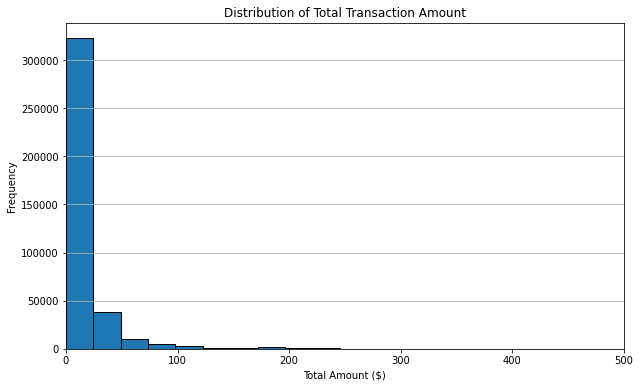

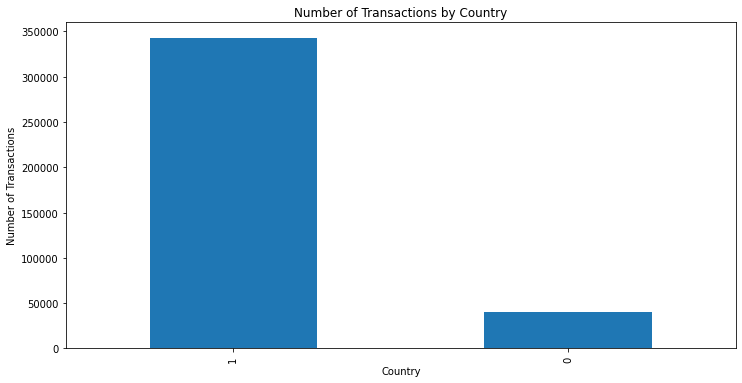

In [13]:
# Plot Distribution of Total Transaction Amount
plt.figure(figsize=(10, 6))
plt.hist(data['TotalAmount'], bins=50, edgecolor='k')
plt.title('Distribution of Total Transaction Amount')
plt.xlabel('Total Amount ($)')
plt.ylabel('Frequency')
plt.xlim(0, 500)  # Limit x-axis to remove extreme outliers
plt.grid(axis='y')
plt.show()

# Plot the Number of Transactions by Country
plt.figure(figsize=(12, 6))
data['Country_United Kingdom'].value_counts().plot(kind='bar')
plt.title('Number of Transactions by Country')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.show()

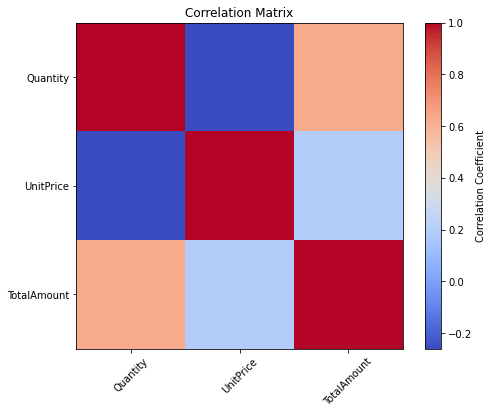

             Quantity  UnitPrice  TotalAmount
Quantity     1.000000  -0.260169     0.622836
UnitPrice   -0.260169   1.000000     0.195341
TotalAmount  0.622836   0.195341     1.000000


In [14]:
# Correlation Matrix for Numerical Features
correlation_matrix = data[['Quantity', 'UnitPrice', 'TotalAmount']].corr()

# Plot Correlation Matrix as a Heatmap
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

# Display Correlation Matrix Values
print(correlation_matrix)